In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, LeakyReLU, Activation
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets
from sklearn.model_selection import train_test_split

from keras.optimizers import SGD

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 42)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((35000, 32, 32, 3), (15000, 32, 32, 3), (35000, 1), (15000, 1))

In [ ]:
# Convert class vectors to binary class matrices. This is called one hot encoding.
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
print(y_train.shape, y_val.shape)

(35000, 10) (15000, 10)


In [ ]:
# Normalize the data. Before we need to convert data type to float for computation.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [ ]:
print(x_train.shape)
print(y_train.shape)

(35000, 32, 32, 3)
(35000, 10)


In [ ]:
def custom_leaky_relu(x):
    return LeakyReLU(0.1)(x)

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation(custom_leaky_relu))

model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation(custom_leaky_relu))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation(custom_leaky_relu))

model.add(Conv2D(256, (3, 3)))
model.add(BatchNormalization())
model.add(Activation(custom_leaky_relu))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3)))
model.add(BatchNormalization())
model.add(Activation(custom_leaky_relu))

model.add(Conv2D(512, (3, 3)))
model.add(BatchNormalization())
model.add(Activation(custom_leaky_relu))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation(custom_leaky_relu))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_14 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 activation_14 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 conv2d_29 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_15 (Bat  (None, 28, 28, 64)       256       
 chNormalization)                                                
                                                                 
 activation_15 (Activation)  (None, 28, 28, 64)       

In [ ]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

datagen.fit(x_train)


history = model.fit(
    datagen.flow(x_train, y_train, batch_size=128, subset='training'),
    epochs=50,
    validation_data=datagen.flow(x_train, y_train, batch_size=128)
)

# history = model.fit(x_train, y_train, epochs=20,
#                     validation_data=(x_val, y_val))

Epoch 1/50
219/219 [==============================] - 90s 158ms/step - loss: 1.7053 - accuracy: 0.4011 - val_loss: 3.8013 - val_accuracy: 0.1191
Epoch 2/50
219/219 [==============================] - 34s 157ms/step - loss: 1.2774 - accuracy: 0.5468 - val_loss: 2.3558 - val_accuracy: 0.3067
Epoch 3/50
219/219 [==============================] - 34s 158ms/step - loss: 1.0889 - accuracy: 0.6152 - val_loss: 1.3516 - val_accuracy: 0.5371
Epoch 4/50
219/219 [==============================] - 34s 157ms/step - loss: 0.9683 - accuracy: 0.6571 - val_loss: 1.0546 - val_accuracy: 0.6238
Epoch 5/50
219/219 [==============================] - 34s 154ms/step - loss: 0.8825 - accuracy: 0.6894 - val_loss: 0.8678 - val_accuracy: 0.6954
Epoch 6/50
219/219 [==============================] - 35s 159ms/step - loss: 0.8324 - accuracy: 0.7114 - val_loss: 1.0229 - val_accuracy: 0.6413
Epoch 7/50
219/219 [==============================] - 34s 156ms/step - loss: 0.7856 - accuracy: 0.7261 - val_loss: 1.0232 - val_ac

In [ ]:
test_eval = model.evaluate(x_test, y_test, verbose=2)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

313/313 - 2s - loss: 0.5041 - accuracy: 0.8478 - 2s/epoch - 6ms/step
Test loss: 0.504051685333252
Test accuracy: 0.8478000164031982


In [ ]:
val_eval = model.evaluate(x_val, y_val, verbose=2)

print('Val loss:', val_eval[0])
print('Val accuracy:', val_eval[1])

469/469 - 2s - loss: 251.7289 - accuracy: 0.4426 - 2s/epoch - 4ms/step
Val loss: 251.72885131835938
Val accuracy: 0.4426000118255615


In [ ]:
train_eval = model.evaluate(x_train, y_train, verbose=2)

print('Train loss:', train_eval[0])
print('Train accuracy:', train_eval[1])

1094/1094 - 5s - loss: 0.2395 - accuracy: 0.9193 - 5s/epoch - 4ms/step
Train loss: 0.2394987940788269
Train accuracy: 0.9193142652511597


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


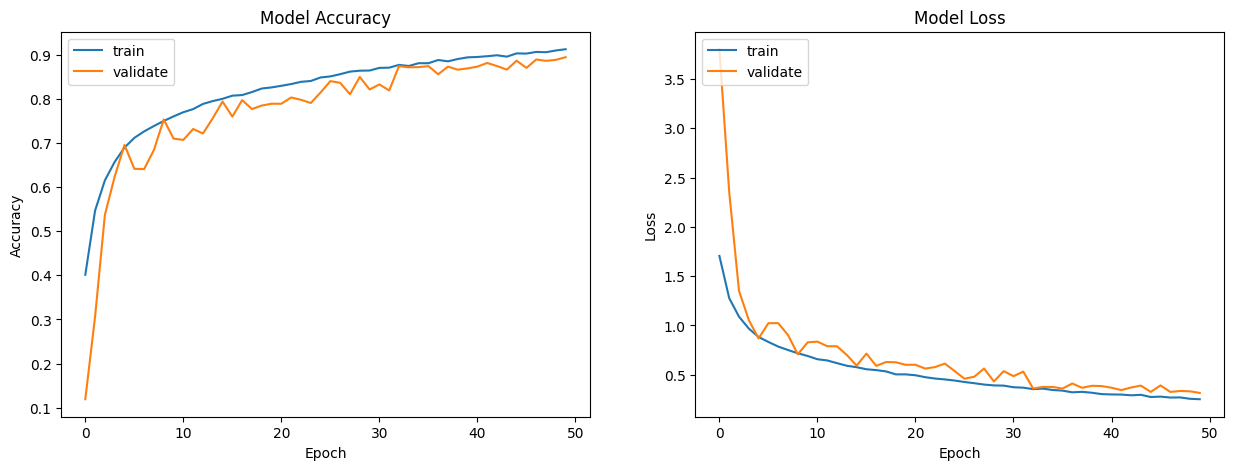

In [ ]:
def plotmodelhistory(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

In [ ]:
predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes), axis = 1)
predicted_classes.shape, y_test.shape

313/313 [==============================] - 1s 3ms/step


((10000,), (10000, 10))

In [ ]:
from sklearn.metrics import classification_report

target_names=['Class {}'.format(1) for i in range(10)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

ValueError: ignored